Thư viện và đọc file csv
sat.trn là file train
sat.tst là file test

Là một bộ dữ liệu trên trang web Machine Learning Repository của Đại học 
California, Irvine. Bộ dữ liệu này chứa thông tin về hình ảnh vệ tinh của một khu vực được chia thành 7 lớp khác nhau. Dữ liệu này được sử dụng để thực hiện các bài toán phân lớp đa lớp trong machine learning.

Bộ dữ liệu chứa 6.435 mẫu và mỗi mẫu được biểu diễn bằng 36 thuộc tính. Các thuộc tính này biểu diễn đặc trưng của vùng đất được quét bởi vệ tinh, bao gồm thông tin về màu sắc, độ sáng, độ tương phản, độ vị trí và độ đồng nhất của vùng. Các lớp của dữ liệu là đại diện cho các mẫu đất khác nhau, bao gồm các khu vực nông thôn, khu dân cư, vùng cây bụi, đất bãi bồi và các vùng khác.



Statlog (Landsat Satellite) là tên của một tập dữ liệu được sử dụng trong các nghiên cứu về học máy và thị giác máy tính. Tập dữ liệu này chứa các hình ảnh vệ tinh Landsat về đa dạng các khu vực đất đai trên toàn thế giới. Mục đích của tập dữ liệu Statlog (Landsat Satellite) là để huấn luyện các mô hình phân loại hình ảnh để phân loại các khu vực đất đai khác nhau dựa trên thông tin về các chỉ số cảnh quan (như độ sáng, màu sắc và chiều cao). Tập dữ liệu này cũng được sử dụng để nghiên cứu các phương pháp giải quyết vấn đề phân loại hình ảnh trong lĩnh vực thị giác máy tính.



MỤC ĐÍCH
Cơ sở dữ liệu bao gồm các giá trị đa phổ
pixel trong vùng lân cận 3x3 trong ảnh vệ tinh,
và phân loại liên quan đến pixel trung tâm
trong mỗi khu phố. Mục đích là để dự đoán điều này
phân loại, đưa ra các giá trị đa phổ. Trong
cơ sở dữ liệu mẫu, lớp của pixel được mã hóa thành
một số.

Phân lớp

36 (= 4 dải quang phổ x 9 điểm ảnh lân cận )

In [ ]:
import numpy as np 
import pandas as pd 
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split 

# Load dữ liệu
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/satimage/sat.trn'
sat_train = pd.read_csv(url, header=None, sep=' ');
print(sat_train.shape)
url1 = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/satimage/sat.tst'
sat_test = pd.read_csv(url1, header=None, sep=' ',);
print(sat_test.shape)
# Chia dữ liệu thành các feature vectors và nhãn
X_train = sat_train.iloc[:, :-1] 
y_train = sat_train.iloc[:, -1] 
X_test = sat_test.iloc[:, :-1] 
y_test = sat_test.iloc[:, -1] 

sat_train.rename(columns={36: 'Class'}, inplace=True)
sat_test.rename(columns={36: 'Class'}, inplace=True)


sat_train.head()
sat_train['Class'].value_counts()

In [ ]:
sat_test['Class'].value_counts()

7    470
1    461
3    397
5    237
2    224
4    211
Name: Class, dtype: int64

1 đất đỏ

2 đất vụ bông

3 đất xám

4 đất xám ẩm

5 đất có gốc rạ

6 lớp hỗn hợp (có mặt tất cả các loại)

7 đất xám rất ẩm

In [ ]:
# Đặt tên cột
txt = ['top_left1', 'top_left2', 'top_left3', 'top_left4', 
       'top_center1', 'top_center2', 'top_center3', 'top_center4',
       'top_right1', 'top_right2', 'top_right3', 'top_right4',
       'middle_left1', 'middle_left2', 'middle_left3', 'middle_left4', 
       'middle_center1', 'middle_center2', 'middle_center3', 'middle_center4',
       'middle_right1', 'middle_right2', 'middle_right3', 'middle_right4',
       'bottom_left1', 'bottom_left2', 'bottom_left3', 'bottom_left4', 
       'bottom_center1', 'bottom_center2', 'bottom_center3', 'bottom_center4',
       'bottom_right1', 'bottom_right2', 'bottom_right3', 'bottom_right4', 'Class']

sat_train = pd.read_csv(url, header=None, sep=' ',names=txt,dtype=str);
sat_train

,top_left1,top_left2,top_left3,top_left4,top_center1,top_center2,top_center3,top_center4,top_right1,top_right2,...,bottom_left4,bottom_center1,bottom_center2,bottom_center3,bottom_center4,bottom_right1,bottom_right2,bottom_right3,bottom_right4,Class
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4430,56,64,108,96,64,71,108,96,68,75,...,92,66,83,108,96,66,87,104,89,5
4431,64,71,108,96,68,75,108,96,71,87,...,96,66,87,104,89,63,87,104,89,5
4432,68,75,108,96,71,87,108,88,71,91,...,89,63,87,104,89,70,100,104,85,4
4433,71,87,108,88,71,91,100,81,76,95,...,89,70,100,104,85,70,91,104,85,4


Nếu sử dụng 'macro', F1 score được tính trung bình trên tất cả các lớp, với trọng số giống nhau đối với mỗi lớp. Điều này giúp cho F1 score được tính toán độc lập với kích thước của mỗi lớp, và do đó không bị ảnh hưởng bởi sự mất cân bằng giữa các lớp.



Random Forest là một thuật toán phân loại mạnh mẽ và phổ biến trong lĩnh vực học máy và thị giác máy tính. Để áp dụng thuật toán Random Forest cho tập dữ liệu Statlog (Landsat Satellite), bạn có thể làm theo các bước sau:

1. Chuẩn bị dữ liệu: Bạn cần chuẩn bị tập dữ liệu Statlog (Landsat Satellite) và chia nó thành tập huấn luyện và tập kiểm tra. Các tính năng của dữ liệu cần được chuẩn hoá trước khi đưa vào huấn luyện và kiểm tra.

2. Tạo mô hình: Bạn có thể tạo một mô hình Random Forest bằng cách sử dụng các thư viện học máy phổ biến như scikit-learn trong Python. Bạn cần chỉ định các siêu tham số cho mô hình như số lượng cây quyết định và số lượng tính năng được sử dụng lựa chọn ở mỗi nút trong mỗi cây.

3. Huấn luyện mô hình: Sau khi có mô hình, bạn có thể huấn luyện n\ó trên tập dữ liệu huấn luyện. Trong quá trình huấn luyện, các cây quyết định trong mô hình Random Forest sẽ được sinh ra và tập hợp ý kiến của chúng sẽ được sử dụng để đưa ra quyết định cuối cùng.

4. Kiểm tra mô hình: Sau khi huấn luyện mô hình, bạn cần sử dụng tập kiểm tra để kiểm tra độ chính xác của mô hình. Bạn cần so sánh kết quả dự đoán của mô hình với nhãn thực tế của từng điểm dữ liệu để đánh giá độ chính xác của mô hình.

5. Đánh giá mô hình và tinh chỉnh siêu tham số: Nếu mô hình không đạt được độ chính xác mong đợi, bạn có thể thử điều chỉnh các siêu tham số của mô hình như số lượng cây quyết định hoặc số lượng tính năng được sử dụng lựa chọn ở mỗi nút để đạt được kết quả tốt hơn.


max_features='sqrt': là số lượng đặc trưng (features) được sử dụng để xây dựng mỗi cây quyết định. Đối với mô hình này, chúng ta sử dụng căn bậc hai của tổng số đặc trưng có sẵn, được tính bằng cách sử dụng tham số đầu vào ‘sqrt’. Theo đó, nếu tổng số đặc trưng là 20 thì mỗi cây quyết định sẽ sử dụng khoảng 4 đến 5 đặc trưng ngẫu nhiên để xây dựng.

n_estimators=100: là số lượng cây quyết định (decision tree) được sử dụng trong mô hình

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
# Xây dựng mô hình Random Forest 
rf_model = RandomForestClassifier(n_estimators=100, max_features='sqrt') 
# Huấn luyện mô hình trên tập huấn luyện 
rf_model.fit(X_train, y_train) 
# Sử dụng mô hình để dự đoán kết quả trên tập kiểm tra 
y_pred = rf_model.predict(X_test) 
# Đánh giá độ chính xác của mô hình trên tập kiểm tra 
f1_rf = f1_score(y_test, y_pred, average='macro') 
print("F1 :", f1_rf)

F1 : 0.8903152826594161


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#k=50
knn_model = KNeighborsClassifier(n_neighbors=50) 
# Huấn luyện mô hình trên tập huấn luyện
knn_model.fit(X_train, y_train)
# Sử dụng mô hình để dự đoán kết quả trên tập kiểm tra 
y_pred = knn_model.predict(X_test)
f1_knn = f1_score(y_test, y_pred, average='macro')
print("F1: ",f1_knn)

F1:  0.8464355583117413


Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
bayes_model = GaussianNB()
bayes_model.fit(X_train, y_train)
y_pred = bayes_model.predict(X_test)
f1_bayes = f1_score(y_test, y_pred, average='macro')
print("F1 :", f1_bayes)

F1 : 0.7832759731857281


Cây quyết định 


In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Xây dựng mô hình decision tree
dt_model = DecisionTreeClassifier(criterion="gini",max_depth=5)
# Huấn luyện mô hình trên tập huấn luyện
dt_model.fit(X_train, y_train)
# Sử dụng mô hình để dự đoán kết quả trên tập kiểm tra
y_pred = dt_model.predict(X_test)
# Đánh giá độ chính xác của mô hình trên tập kiểm tra
f1_dt = f1_score(y_test, y_pred, average='macro')
print("F1 :", f1_dt)

F1 : 0.76512911106518


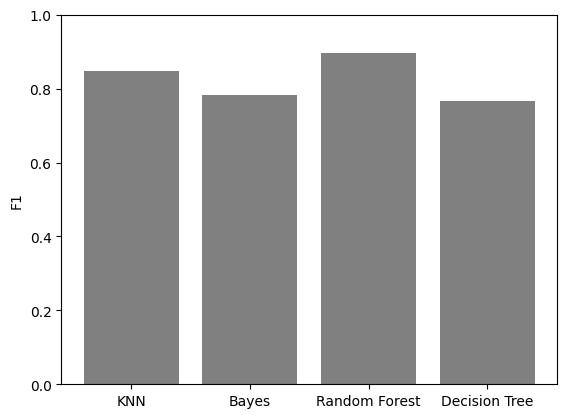

In [ ]:
import matplotlib.pyplot as plt

models = ['KNN', 'Bayes','Random Forest','Decision Tree'] 
accuracy = [f1_knn, f1_bayes,f1_rf,f1_dt] 
plt.bar(models, accuracy, color='gray') 
plt.ylabel("F1") 
plt.ylim(0.0, 1.0) 
plt.show()